In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np

In [6]:
# Dataset
# Updated dataset with related documents
documents = [
    "Artificial and artificial intelligence is transforming various industries, including healthcare and healthcare, finance, and transportation.",
    "The impact of artificial intelligence on healthcare is significant, with applications in diagnostics, drug discovery, and personalized medicine.",
    "Finance is leveraging artificial intelligence to improve fraud detection, risk assessment, and algorithmic trading strategies.",
    "Transportation and logistics are being revolutionized by artificial intelligence, enabling autonomous vehicles, route optimization, and supply chain management.",
    "The integration of artificial intelligence in healthcare, finance, and transportation is driving innovation and efficiency across these sectors.",
    "AI-powered technologies are reshaping the healthcare landscape, offering advanced tools for diagnosis, treatment planning, and patient monitoring.",
    "Financial institutions are adopting artificial intelligence to gain insights from large volumes of data, enhance customer experiences, and mitigate risks.",
    "Smart transportation systems powered by artificial intelligence are improving safety, reducing congestion, and optimizing resource utilization.",
    "The convergence of artificial intelligence and healthcare, finance, and transportation is creating new opportunities for growth and transformation.",
    "Artificial intelligence is a key key driver of innovation in healthcare, finance, and transportation, empowering organizations to deliver better services and outcomes."
]

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_document(document):
    # Tokenize the document
    tokens = word_tokenize(document)
    # Remove punctuation and convert to lowercase
    tokens = [token.lower() for token in tokens if token.isalpha()]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
re = preprocess_document(str(documents))
re

['artifici',
 'intellig',
 'transform',
 'variou',
 'industri',
 'includ',
 'healthcar',
 'healthcar',
 'financ',
 'transport',
 'impact',
 'artifici',
 'intellig',
 'healthcar',
 'signific',
 'applic',
 'diagnost',
 'drug',
 'discoveri',
 'person',
 'medicin',
 'leverag',
 'artifici',
 'intellig',
 'improv',
 'fraud',
 'detect',
 'risk',
 'assess',
 'algorithm',
 'trade',
 'strategi',
 'logist',
 'revolution',
 'artifici',
 'intellig',
 'enabl',
 'autonom',
 'vehicl',
 'rout',
 'optim',
 'suppli',
 'chain',
 'manag',
 'integr',
 'artifici',
 'intellig',
 'healthcar',
 'financ',
 'transport',
 'drive',
 'innov',
 'effici',
 'across',
 'sector',
 'technolog',
 'reshap',
 'healthcar',
 'landscap',
 'offer',
 'advanc',
 'tool',
 'diagnosi',
 'treatment',
 'plan',
 'patient',
 'monitor',
 'institut',
 'adopt',
 'artifici',
 'intellig',
 'gain',
 'insight',
 'larg',
 'volum',
 'data',
 'enhanc',
 'custom',
 'experi',
 'mitig',
 'risk',
 'transport',
 'system',
 'power',
 'artifici',
 'intel

In [9]:
def build_inverted_index (documents):
    inverted_index = {}
    for doc_id, document in enumerate(documents):
        terms = preprocess_document(document)
        for term in terms:
            if term not in inverted_index:
                inverted_index[term] = set()
            inverted_index[term].add(doc_id)
    return inverted_index

In [10]:
inverted_index = build_inverted_index(documents)
inverted_index 

{'artifici': {0, 1, 2, 3, 4, 6, 7, 8, 9},
 'intellig': {0, 1, 2, 3, 4, 6, 7, 8, 9},
 'transform': {0, 8},
 'variou': {0},
 'industri': {0},
 'includ': {0},
 'healthcar': {0, 1, 4, 5, 8, 9},
 'financ': {0, 2, 4, 8, 9},
 'transport': {0, 3, 4, 7, 8, 9},
 'impact': {1},
 'signific': {1},
 'applic': {1},
 'diagnost': {1},
 'drug': {1},
 'discoveri': {1},
 'person': {1},
 'medicin': {1},
 'leverag': {2},
 'improv': {2, 7},
 'fraud': {2},
 'detect': {2},
 'risk': {2, 6},
 'assess': {2},
 'algorithm': {2},
 'trade': {2},
 'strategi': {2},
 'logist': {3},
 'revolution': {3},
 'enabl': {3},
 'autonom': {3},
 'vehicl': {3},
 'rout': {3},
 'optim': {3, 7},
 'suppli': {3},
 'chain': {3},
 'manag': {3},
 'integr': {4},
 'drive': {4},
 'innov': {4, 9},
 'effici': {4},
 'across': {4},
 'sector': {4},
 'technolog': {5},
 'reshap': {5},
 'landscap': {5},
 'offer': {5},
 'advanc': {5},
 'tool': {5},
 'diagnosi': {5},
 'treatment': {5},
 'plan': {5},
 'patient': {5},
 'monitor': {5},
 'financi': {6},
 'i

In [11]:
def boolean_query(query,inverted_index,documents):
    query_terms = preprocess_document(query)
    result = None
    results = []
    
    for term in query_terms:
        if term in inverted_index:
            term_docs = inverted_index[term]
            if result is None:
                results = term_docs
            else:
                results = results + result.intersection(term_docs)

    if results is None:
        print("No documents match the query.")
    else:
        print("Matching Documents:")
        for doc_id in results:
            print(f"- Document{doc_id}:{documents[doc_id]}")

In [12]:
query ="intelligence OR healthcare"

In [13]:
result = boolean_query(query ,inverted_index , documents )

Matching Documents:
- Document0:Artificial and artificial intelligence is transforming various industries, including healthcare and healthcare, finance, and transportation.
- Document1:The impact of artificial intelligence on healthcare is significant, with applications in diagnostics, drug discovery, and personalized medicine.
- Document4:The integration of artificial intelligence in healthcare, finance, and transportation is driving innovation and efficiency across these sectors.
- Document5:AI-powered technologies are reshaping the healthcare landscape, offering advanced tools for diagnosis, treatment planning, and patient monitoring.
- Document8:The convergence of artificial intelligence and healthcare, finance, and transportation is creating new opportunities for growth and transformation.
- Document9:Artificial intelligence is a key key driver of innovation in healthcare, finance, and transportation, empowering organizations to deliver better services and outcomes.


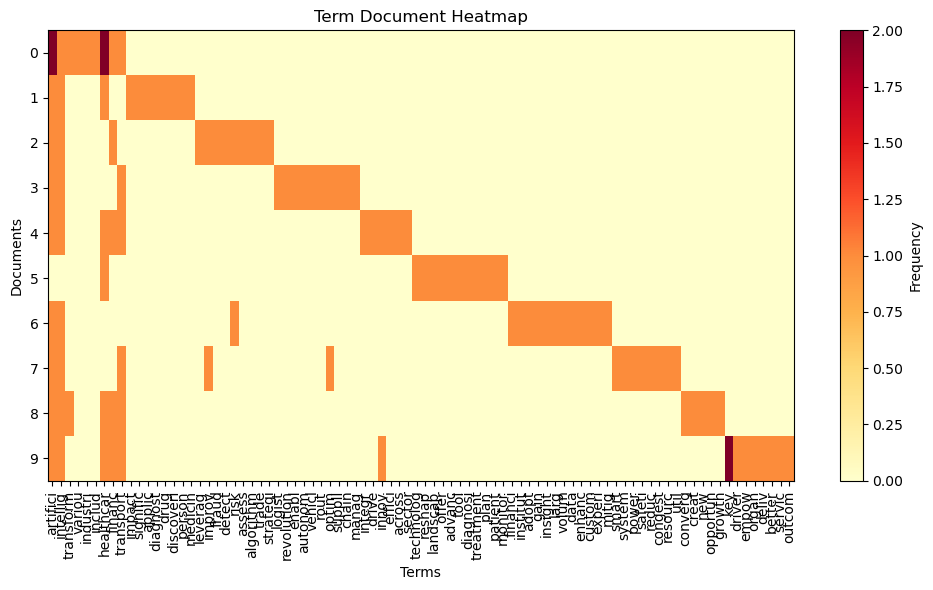

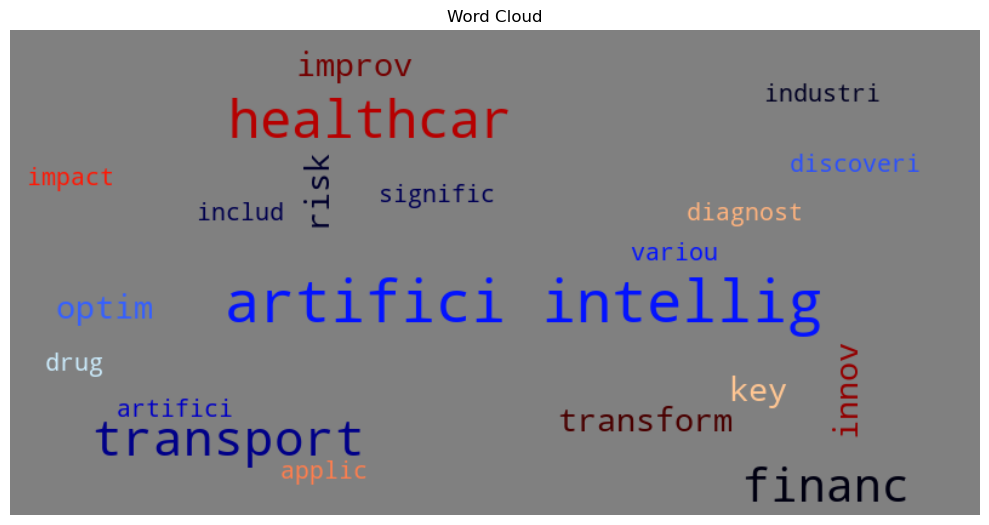

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

# Create a matrix for the heatmap
heatmap_data = np.zeros((len(documents), len(inverted_index)))

for term_idx, term in enumerate(inverted_index.keys()):
    for doc_idx, doc in enumerate(documents):
        frequency = preprocess_document(doc).count(term)
        heatmap_data[doc_idx][term_idx] = frequency

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')  # Use a different colormap for frequency
plt.title('Term Document Heatmap')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.xticks(np.arange(len(inverted_index)), inverted_index.keys(), rotation=90)
plt.yticks(np.arange(len(documents)), range(len(documents)))
plt.colorbar(label='Frequency')
plt.tight_layout()
plt.show()

# Create a word cloud
wordcloud_text = ' '.join(preprocess_document(' '.join(documents)))
wordcloud = WordCloud(width=800, height=400, max_font_size=50, max_words=20, background_color="gray"
                      , colormap='flag').generate(wordcloud_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()